# Darwin's Finches: Statistical Inference

## 1. Introduction

![Two finches on a tree branch](./img/finches.jpg "Two finches on a tree branch")

__Project Goal__  
The goal of this project is to analyze 40 years of data collected by Peter and Rosemary Grant on the Galapagos island of Daphne Major published in their book [40 Years of Evolution: Darwin's Finches on Daphne Major Island](https://press.princeton.edu/books/hardcover/9780691160467/40-years-of-evolution). The data is about Darwin's finches specifically the _Geospiza Fortis_ (fortis) and the _Geospiza Scandens_ (scandens) species. The project uses beak length and depth measurement to highlight evolutionary traits.

__Analytical Goal__  
The analysis will mainly focus on using __statistical inference__ methods.
- Exploratory Data Analysis
- Bootstrapping
- Parameter estimatation
- Hypothesis testing

## 2. Data Loading

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# load 1975 data
df_1975 = pd.read_csv("data/finch_beaks_1975.csv")

In [3]:
# print first few rows of the 1975 DataFrame
df_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [4]:
# load the 2012 data
df_2012 = pd.read_csv("data/finch_beaks_2012.csv")

In [5]:
# print first few rows of the 2012 DataFrame
df_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [6]:
# load the fortis heredity data
df_fortis_heredity = pd.read_csv("data/fortis_beak_depth_heredity.csv")

In [7]:
# print first few rows of the fortis heredity DataFrame
df_fortis_heredity.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [8]:
# load the scandens heredity data
df_scandens_heredity = pd.read_csv("data/scandens_beak_depth_heredity.csv")

In [9]:
# print first few rows of the scandens heredity DataFrame
df_scandens_heredity.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


## 3. Data Cleaning

In [10]:
# rename columns in the 1975 and 2012 DataFrames
column_name_lst = ["band", "species", "beak_length", "beak_depth"]
df_1975.columns = column_name_lst
df_2012.columns = column_name_lst

# verify that the column names have changed
assert df_1975.columns[2] == column_name_lst[2]

In [11]:
# rename columns in fortis heredity DataFrame
column_name_lst = ["mid_offspring_beak_depth", "male_beak_depth", "female_beak_depth"]
df_fortis_heredity.columns = column_name_lst

# verify that the column names have changed
assert df_fortis_heredity.columns[1] == column_name_lst[1]

In [12]:
# rename columns in scandens heredity DataFrame
column_name_lst = ["mid_parent_beak_depth", "mid_offspring_beak_depth"]
df_scandens_heredity.columns = column_name_lst

# verify that the column names have changed
assert df_scandens_heredity.columns[1] == column_name_lst[1]

In [13]:
# Add year column to the 1975 and 2012 Dataframes
df_1975["year"] = 1975
df_2012["year"] = 2012

# verify that the column has been added with the value
assert df_1975.columns[-1] == "year"
assert df_2012.iloc[0, -1] == 2012

In [14]:
# combine the 1975 and 2012 DataFrames into one DataFrame
df_finch = pd.concat([df_1975, df_2012], ignore_index=True)

# check first few rows of DataFrame
df_finch.tail()

,band,species,beak_length,beak_depth,year
646,21295,scandens,14.2,9.3,2012
647,21297,scandens,13.0,9.8,2012
648,21340,scandens,14.6,8.9,2012
649,21342,scandens,13.1,9.8,2012
650,21347,scandens,15.2,9.1,2012


In [15]:
# Add mid parent fortis beak depth column to the fortis heredity DataFrame
df_fortis_heredity["mid_parent_beak_depth"] = df_fortis_heredity[["male_beak_depth", "female_beak_depth"]].mean(axis=1)

# check first few rows of the DataFrame
df_fortis_heredity.head()

,mid_offspring_beak_depth,male_beak_depth,female_beak_depth,mid_parent_beak_depth
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125


## 4. Data Analysis of Beak Measurements

### 4.1 Basic Info and Descriptive Statistics

In [16]:
# check basic info on finch DataFrame
df_finch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   band         651 non-null    int64  
 1   species      651 non-null    object 
 2   beak_length  651 non-null    float64
 3   beak_depth   651 non-null    float64
 4   year         651 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 25.6+ KB


In [17]:
# check basic info on fortis heredity DataFrame
df_fortis_heredity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mid_offspring_beak_depth  413 non-null    float64
 1   male_beak_depth           413 non-null    float64
 2   female_beak_depth         413 non-null    float64
 3   mid_parent_beak_depth     413 non-null    float64
dtypes: float64(4)
memory usage: 13.0 KB


In [18]:
# check basic info on scandens heredity DataFrame
df_scandens_heredity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mid_parent_beak_depth     130 non-null    float64
 1   mid_offspring_beak_depth  130 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [19]:
# check basic descriptive statistics on finch DataFrame
df_finch.describe().T

,count,mean,std,min,25%,50%,75%,max
band,651.0,8824.215054,9586.864492,2.0,571.5,923.0,19659.0,22000.00
beak_length,651.0,11.588618,1.659108,8.7,10.3,11.0,13.1,15.94
beak_depth,651.0,9.040952,0.735171,7.2,8.5,9.0,9.6,11.10
year,651.0,1989.095238,17.981790,1975.0,1975.0,1975.0,2012.0,2012.00


In [20]:
# check basic descriptive statistics on fortis heredity DataFrame
df_fortis_heredity.describe().T

,count,mean,std,min,25%,50%,75%,max
mid_offspring_beak_depth,413.0,9.304649,0.685714,7.14,8.87,9.34,9.77,11.19
male_beak_depth,413.0,9.658862,0.990094,6.40,9.10,9.70,10.30,12.70
female_beak_depth,413.0,9.309685,0.833508,5.50,8.70,9.30,10.00,11.30
mid_parent_beak_depth,413.0,9.484274,0.690871,7.25,9.05,9.55,9.95,11.55


In [21]:
# check basic descriptive statistics on scandens heredity DataFrame
df_scandens_heredity.describe().T

,count,mean,std,min,25%,50%,75%,max
mid_parent_beak_depth,130.0,9.184502,0.322264,8.3318,8.94365,9.1991,9.4046,10.0023
mid_offspring_beak_depth,130.0,9.042415,0.429367,8.0089,8.78540,9.0342,9.2905,10.4089


From these basics exploration, it can be noticed that the datasets have no missing values, and the values can validated by being in reasonable ranges.

### 4.2 EDA of beak depths of Darwin's finches

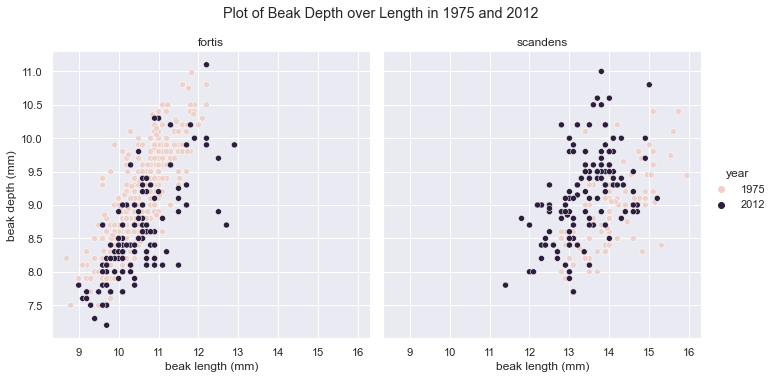

In [22]:
# plot of each species in each year
g = sns.relplot(x="beak_length", y="beak_depth", data=df_finch, 
                kind="scatter", col="species", hue="year");
g.fig.suptitle("Plot of Beak Depth over Length in 1975 and 2012", y=1.05)
g.set_titles("{col_name}")
g.set(xlabel="beak length (mm)", ylabel="beak depth (mm)");

From these scatter plots, it can be notice that beak depth to length ratio has not change that much for the fortis species because there is a large overlap between the the measurements over both periods. However, for the scandens species, a striking difference in beak measurement relationship can be noticed over the two periods.

In [23]:
# create a DataFrame for just the scandens species
df_scandens = df_finch[df_finch["species"] == "scandens"].reset_index(drop=True)

# check first few rows of the DataFrame
df_scandens.head()

,band,species,beak_length,beak_depth,year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975


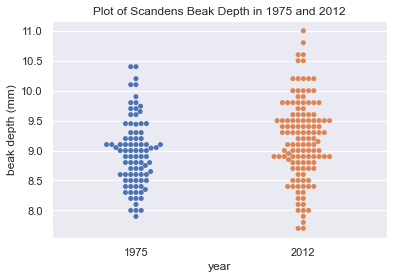

In [24]:
# create a bee swarm plot for the scandens species
sns.swarmplot(x="year", y="beak_depth", data=df_scandens)
plt.xlabel("year")
plt.ylabel("beak depth (mm)")
plt.title("Plot of Scandens Beak Depth in 1975 and 2012");

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

### 4.3 ECDFs of beak depths

In [25]:
# create function to calculate the Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    
    Parameter
    ----------
    data : NumPy Array
      One dimensional NumPy array.
      
    Returns
    -------
    x : NumPy Array
      Ordered one dimensional NumPy array.
    y : NumPy Array
      Ordered percentiles of the data in a NumPy array.
    """
    # number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [26]:
# create beak depth arrays: bd_1975 and bd_2012
bd_1975 = df_scandens[df_scandens["year"] == 1975]["beak_depth"].values
bd_2012 = df_scandens[df_scandens["year"] == 2012]["beak_depth"].values

In [27]:
# compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

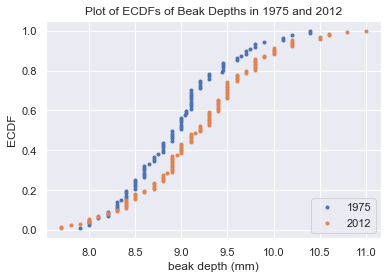

In [28]:
# plot the ECDFs
plt.plot(x_1975, y_1975, marker=".", linestyle="none")
plt.plot(x_2012, y_2012, marker=".", linestyle="none")

plt.margins(0.05)

plt.xlabel("beak depth (mm)")
plt.ylabel("ECDF")
plt.title("Plot of ECDFs of Beak Depths in 1975 and 2012")
plt.legend(("1975", "2012"), loc="lower right");

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

### 4.4 Parameter estimates of beak depths

In [29]:
# create function to generate bootstrap replicate on 1D array: bs_rep_1d(data, func)
def bs_rep_1d(data, func):
    """
    Generate bootstrap replicate of 1D data with aggregate func.
    
    Parameters
    ----------
    data : NumPy Array
      One dimensional NumPy array.
    func : Function
      Aggregation function to be applied to the bootstrap sample.
      
    Return
    ------
    func_value : Int
      Return value from the aggregation function.
    """
    # generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(data, len(data))
    
    # aggregate bs_sample using func
    return func(bs_sample)

In [30]:
# create function to draw bootstrap replicates: draw_bs_rep(data, func, size=1)
def draw_bs_rep(data, func, size=1):
    """
    Draw bootstrap replicates of size of data with aggregate func.
    
    Parameters
    ----------
    data : NumPy Array
      One dimensional NumPy array.
    func : Function
      Aggregation function to be applied to the bootstrap sample.
    size : Int, optional
      Size of replicate to be drawn.
      Default=1.
      
    Return
    ------
    bs_replicate : NumPy Array
      NumPy array of the aggregate values of the replicates.
    """

    # initialize array of bootstrap replicates: bs_replicates
    bs_rep = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_rep[i] = bs_rep_1d(data, func)

    return bs_rep

In [31]:
# compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

In [32]:
# take 10,000 bootstrap replicates of the mean
rep_size = 10000

# get bootstrap replicates of means: bs_rep_1975 and bs_rep_2012
bs_rep_1975 = draw_bs_rep(bd_1975, np.mean, rep_size)
bs_rep_2012 = draw_bs_rep(bd_2012, np.mean, rep_size)

In [33]:
# compute samples of difference of means: bs_diff_rep
bs_diff_rep = bs_rep_2012 - bs_rep_1975

In [34]:
# compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_rep, [2.5, 97.5])

In [35]:
# print the results
print(f"Difference of means = {mean_diff:.2f} mm.")
print(f"95% confidence interval = [{conf_int[0]:.2f}, {conf_int[1]:.2f}] mm.")

Difference of means = 0.23 mm.
95% confidence interval = [0.06, 0.39] mm.


Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of _G. scandens_ on Daphne Major have gotten deeper.

### 4.5 Hypothesis test: Are beaks deeper in 2012?

The hypothesis is that the means are equal. In other words, the question is what is the probability that the observed difference in mean beak depth would be the same if the means were the same?. To perform this hypothesis test, the two data sets need to be shifted so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [36]:
# compute mean of combined data set: comb_mean
comb_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

In [37]:
# shift the samples: bd_1975_shift and bd_2012_shift
bd_1975_shift = bd_1975 - np.mean(bd_1975) + comb_mean
bd_2012_shift = bd_2012 - np.mean(bd_2012) + comb_mean

In [38]:
# get bootstrap replicates of shifted data sets: bs_rep_1975_shift and bs_rep_2012_shift
bs_rep_1975_shift = draw_bs_rep(bd_1975_shift, np.mean, 10000)
bs_rep_2012_shift = draw_bs_rep(bd_2012_shift, np.mean, 10000)

In [39]:
# Compute replicates of difference of means: bs_diff_rep
bs_diff_rep_shift = bs_rep_2012_shift - bs_rep_1975_shift

In [40]:
# compute the p-value
p = np.sum(bs_diff_rep_shift >= mean_diff) / len(bs_diff_rep_shift)

In [41]:
# print p-value
print(f"p = {p}")

p = 0.0045


This suggests that there is a statistically significant difference. It is very important to know how different they are. Previously, the calculated mean difference was 0.23 mm. Changing by 0.23 mm in 37 years is substantial by evolutionary standards.

### 4.6 EDA of beak length and depth

In [42]:
# create beak length arrays: bl_1975 and bl_2012
bl_1975 = df_scandens[df_scandens["year"] == 1975]["beak_length"].values
bl_2012 = df_scandens[df_scandens["year"] == 2012]["beak_length"].values

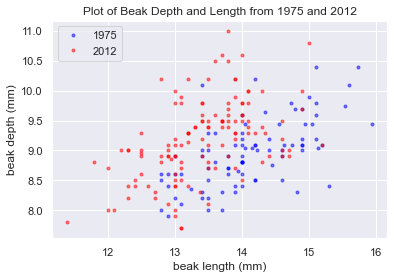

In [43]:
# make scatter plots of beak depth vs beak length for the 1975 and 2012 specimens
plt.plot(bl_1975, bd_1975, marker='.', linestyle='None', color='blue', alpha=0.5)
plt.plot(bl_2012, bd_2012, marker='.', linestyle='None', color='red', alpha=0.5)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.title("Plot of Beak Depth and Length from 1975 and 2012")
plt.legend(('1975', '2012'), loc='upper left');

In looking at the plot, it can be seen that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### 4.7 Linear regressions

In [44]:
# create function to perform pairs bootstrap for linear regression: draw_bs_pairs_linreg(x, y, size=1)
def draw_bs_pairs_linreg(x, y, size=1):
    """
    Perform pairs bootstrap for linear regression.
    
    Parameters
    ----------
    x : NumPy Array
      X values for linear regression.
    y : NumPy Array
      Y values for linear regression.
    size : Int, optional
      Size of bootstrap replicate to be drawn.
      Default=1
      
    Returns
    -------
    bs_slope_reps : Float
      Slope of linear regression from bootstrap.
    bs_intercept_reps : Float
      Intercept of linear regression from bootstrap.
    """

    # set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [45]:
# compute the linear regressions slopes and intercepts
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

In [46]:
# perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

In [47]:
# compute confidence intervals of slopes and intercepts
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

In [48]:
# Print the results
print(f"1975: slope = {slope_1975:.2f},",
      f"conf int = [{slope_conf_int_1975[0]:.2f}, {slope_conf_int_1975[1]:.2f}]")
print(f"1975: intercept = {intercept_1975:.2f},",
      f"conf int = [{intercept_conf_int_1975[0]:.2f}, {intercept_conf_int_1975[1]:.2f}]")
print(f"2012: slope = {slope_2012:.2f},",
      f"conf int = [{slope_conf_int_2012[0]:.2f}, {slope_conf_int_2012[1]:.2f}]")
print(f"2012: intercept = {intercept_2012:.2f},",
      f"conf int = [{intercept_conf_int_2012[0]:.2f}, {intercept_conf_int_2012[1]:.2f}]")

1975: slope = 0.47, conf int = [0.33, 0.59]
1975: intercept = 2.39, conf int = [0.71, 4.31]
2012: slope = 0.46, conf int = [0.33, 0.60]
2012: intercept = 2.98, conf int = [1.18, 4.74]


It looks like they have the same slope, but different intercepts. The slope being the same suggests that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years.

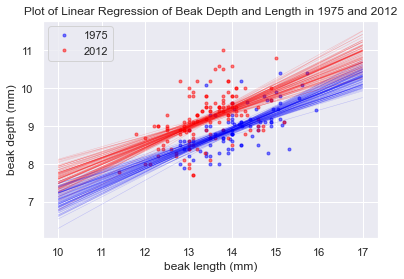

In [49]:
# make scatter plot of the linear regression results
plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')
plt.title("Plot of Linear Regression of Beak Depth and Length in 1975 and 2012")

# generate x-values for bootstrap lines: x
x = np.array([10, 17])

# plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red');

### 4.8 Beak length to depth ratio

In [50]:
# compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

In [51]:
# compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

In [52]:
# generate bootstrap replicates of the means
bs_rep_1975_ratio = draw_bs_rep(ratio_1975, np.mean, 10000)
bs_rep_2012_ratio = draw_bs_rep(ratio_2012, np.mean, 10000)

In [53]:
# compute the 99% confidence intervals
conf_int_1975_ratio = np.percentile(bs_rep_1975_ratio, [0.5, 99.5])
conf_int_2012_ratio = np.percentile(bs_rep_2012_ratio, [0.5, 99.5])

In [54]:
# print the results
print(f"1975: mean ratio = {mean_ratio_1975:.2f},",
      f"conf int = [{conf_int_1975_ratio[0]:.2f}, {conf_int_1975_ratio[1]:.2f}]")
print(f"2012: mean ratio = {mean_ratio_2012:.2f},",
      f"conf int = [{conf_int_2012_ratio[0]:.2f}, {conf_int_2012_ratio[1]:.2f}]")

1975: mean ratio = 1.58, conf int = [1.56, 1.60]
2012: mean ratio = 1.47, conf int = [1.44, 1.49]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

## 5. Data Analysis of Heritability

### 5.1 EDA of heritability

In [55]:
# select heredity arrays from DataFrames
bd_parent_fortis = df_fortis_heredity["mid_parent_beak_depth"].values
bd_offspring_fortis = df_fortis_heredity["mid_offspring_beak_depth"].values
bd_parent_scandens = df_scandens_heredity["mid_parent_beak_depth"].values
bd_offspring_scandens = df_scandens_heredity["mid_offspring_beak_depth"].values

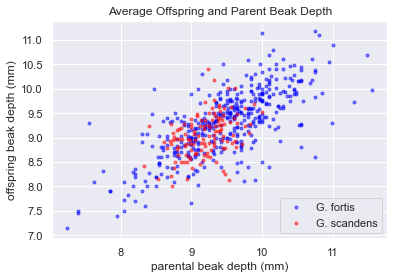

In [56]:
# make scatter plot of the average offspring beak depth vs parent's
plt.plot(bd_parent_fortis, bd_offspring_fortis, 
         marker=".", linestyle="none", color="blue", alpha=0.5)
plt.plot(bd_parent_scandens, bd_offspring_scandens, 
         marker=".", linestyle="none", color="red", alpha=0.5)

plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')
plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
plt.title("Average Offspring and Parent Beak Depth");

It appears as though there is a stronger correlation in _G. fortis_ than in _G. scandens_. This suggests that beak depth is more strongly inherited in _G. fortis_. This correlation will be quantified next.

### 5.2 Pearson correlation of offspring and parental data

In [57]:
# create function that performs pairs bootstrap and computes a single statistic on pairs samples: draw_bs_pairs(x, y, func, size=1)
def draw_bs_pairs(x, y, func, size=1):
    """
    Performs pairs bootstrap for a single statistic.
    
    Parameters
    ----------
    x : NumPy Array
      X values for data.
    y : NumPy Array
      Y values for data.
    func : Function
      Aggregation function to be applied to the bootstrap sample.
    size : Int, optional
      Size of bootstrap replicate to be drawn.
      Default=1
      
    Returns
    -------
    bs_rep : NumPy Array
      NumPy array of the aggregate values of the replicates.
    """

    # set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # initialize replicates: bs_rep
    bs_rep = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_rep[i] = func(bs_x, bs_y)

    return bs_rep

In [58]:
# create pearson_r function: pearson_r(x, y)
def pearson_r(x, y):
    """
    Compute Pearson correlation coefficient between two arrays.
    
    Parameters
    ----------
    x : NumPy Array
      X values for the data.
    y : NumPy Array
      Y values for the data.
      
    Return
    ------
    corr_mat : NumPy Array
      Correlation matrix of x and y.
    """
    # compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # return entry [0,1]
    return corr_mat[0,1]

In [59]:
# compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

In [60]:
# acquire 1000 bootstrap replicates of Pearson r
bs_rep_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_rep_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

In [61]:
# compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_rep_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_rep_fortis, [2.5, 97.5])

In [62]:
# print results
print(f"G. scandens: Pearson r = {r_scandens:.2f}, conf int = [{conf_int_scandens[0]:.2f}, {conf_int_scandens[1]:.2f}]")
print(f"G. fortis: Pearson r = {r_fortis:.2f}, conf int = [{conf_int_fortis[0]:.2f}, {conf_int_fortis[1]:.2f}]")

G. scandens: Pearson r = 0.41, conf int = [0.27, 0.54]
G. fortis: Pearson r = 0.73, conf int = [0.67, 0.78]


It is clear from the confidence intervals that beak depth of the offspring of _G. fortis_ parents is more strongly correlated with their offspring than their _G. scandens_ counterparts.

### 5.3 Measuring heritability

The Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. It makes more sense to define heritability as the ratio of the covariance between parent and offspring to the _variance of the parents alone_.

In [63]:
# create function: heritability(parents, offspring)
def heritability(parents, offspring):
    """
    Compute the heritability from parent and offspring samples.
    
    Parameters
    ----------
    parents : NumPy Array
      Array containing the data for the parent of the species.
    offspring : NumPy Array
      Array containing the data for the offspring of the species.
      
    Return:
      Ratio of the covariance of the trait in parents and 
      offspring divided by the variance of the trait in the parents.
    """
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0, 1] / covariance_matrix[0, 0]

In [64]:
# compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

In [65]:
# acquire 1000 bootstrap replicates of heritability
rep_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000) 
rep_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

In [66]:
# compute 95% confidence intervals
conf_int_scandens = np.percentile(rep_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(rep_fortis, [2.5, 97.5])

In [67]:
# print results
print(f"G. scandens: heritability = {heritability_scandens:.2f}, conf int = [{conf_int_scandens[0]:.2f}, {conf_int_scandens[1]:.2f}]")
print(f"G. fortis: heritability = {heritability_fortis:.2f}, conf int = [{conf_int_fortis[0]:.2f}, {conf_int_fortis[1]:.2f}]")

G. scandens: heritability = 0.55, conf int = [0.35, 0.75]
G. fortis: heritability = 0.72, conf int = [0.65, 0.80]


Here again, it is seen that _G. fortis_ has stronger heritability than _G. scandens_.

### 5.4 Is beak depth heritable at all in _G. scandens_?

In [68]:
# initialize array of replicates: perm_rep
perm_rep = np.empty(shape=10000)

In [69]:
# draw replicates
for i in range(10000):
    # permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_rep[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

In [70]:
# compute p-value: p
p = np.sum(perm_rep >= heritability_scandens) / len(perm_rep)

In [71]:
# print the p-value
print(f"p-val = {p:.2f}")

p-val = 0.00


P-value of zero means that none of the 10,000 permutation pairs replicates drawn had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in _G. scandens_, just not as much as in _G. fortis_.